# Introduction to Customer Segmentation in Python

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


## 1. Data Understanding

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Python/Wholesale customers data.csv")

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# Map the numeric values in Channel and Region columns with Meaningful values.
data['Channel'] = data['Channel'].map({1: 'HoReCa', 2:'Retail'})
data['Region'] = data['Region'].map({1: 'Lisbon', 2:'Porto', 3: 'Other'})


In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [ ]:
# Check basic statistics of the data
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## 2. Exploratory Data Analysis

In [ ]:
data['Region'].value_counts()

Other     316
Lisbon     77
Porto      47
Name: Region, dtype: int64

In [ ]:
data['Channel'].value_counts()

HoReCa    298
Retail    142
Name: Channel, dtype: int64

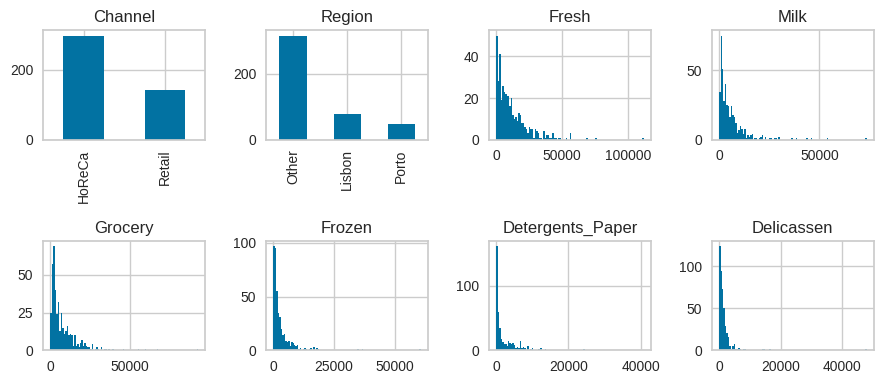

In [ ]:
features = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

fig, axes = plt.subplots(2, 4, figsize=(9,4))

for feature, ax in zip(features, axes.ravel()):
  # We need to visualise categorical data using bar chart
  if (feature=='Channel') | (feature=="Region"):
    data[feature].value_counts().plot.bar(ax=ax)
  # For numeric data, we used histogram
  else:
    ax.hist(data[feature], bins=100)
  ax.set_title(feature)
plt.tight_layout()

<ipython-input-191-e3806e51b31b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


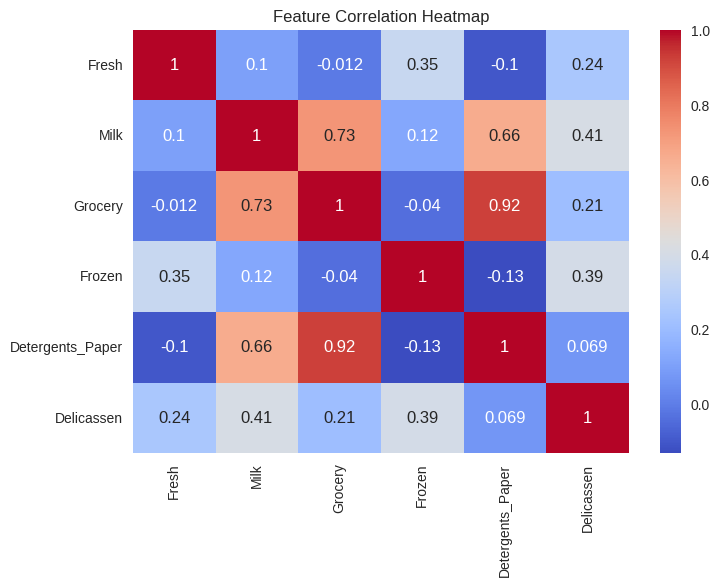

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## 3. Principal Component Analysis

In [ ]:
selected_data = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
selected_data.shape

(440, 6)

In [ ]:
scaler = StandardScaler()
transformed_data = scaler.fit_transform(selected_data)
transformed_data[:, 0].std()

1.0

In [ ]:
pca = PCA(n_components=2)
res_pca = pca.fit_transform(transformed_data)

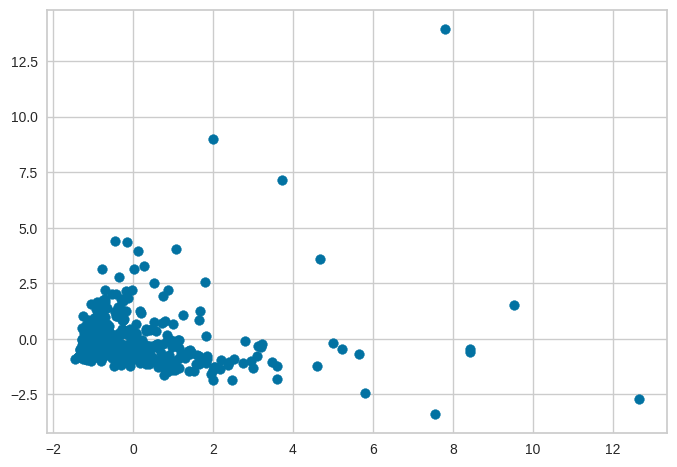

In [ ]:
plt.scatter(res_pca[:,0], res_pca[:, 1])

In [ ]:
transformed_data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [ ]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,HoReCa,Other,29703,12051,16027,13135,182,2204
436,HoReCa,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,HoReCa,Other,10290,1981,2232,1038,168,2125


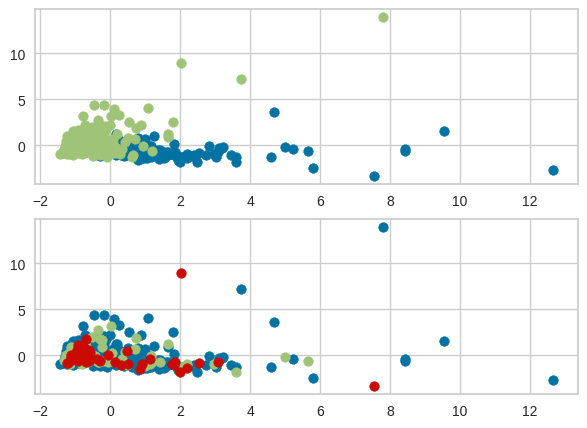

In [ ]:
# Create scatter plots to visualize the distribution of 'Channel' and 'Region'
#features in the first two principal components from PCA.

fig, axes = plt.subplots(2, 1, figsize=(7,5))

for feature, ax in zip(['Channel', 'Region'], axes.ravel()):
  cmap = "Pastell"
  sizes = 20
  for unique_val in data[feature].unique():
    ax.scatter(
        res_pca[data[feature] == unique_val, 0],
        res_pca[data[feature] == unique_val, 1])

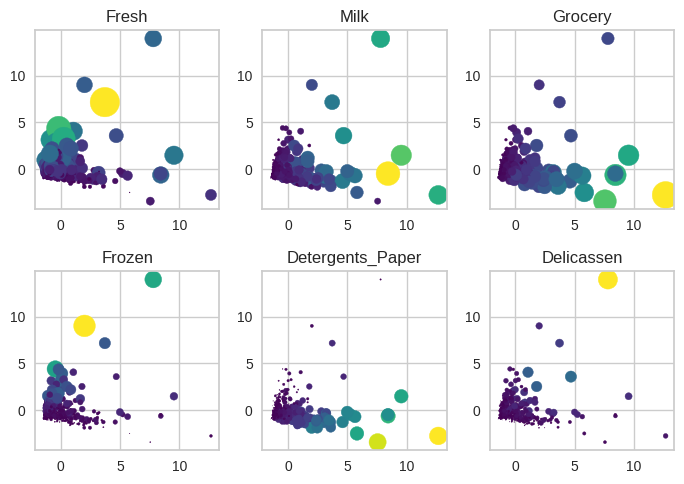

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (7, 5))

features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for feature, ax in zip(features, axes.ravel()):
  cmap = 'viridis'
  sizes = data[feature].values / 250
  cols = data[feature]
  ax.scatter(res_pca[:,0], res_pca[:, 1], s = sizes, c=cols, cmap=cmap)
  ax.set_title(feature)

plt.tight_layout()

# 4. K-Mean Clustering


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


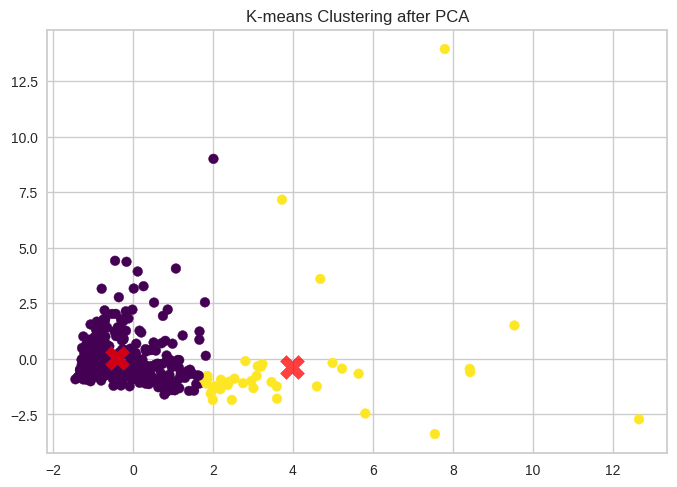

In [ ]:
# Fit KMeans
kmeans = KMeans(n_clusters=2)  # Replace 3 with the number of clusters you want
kmeans.fit(res_pca)
labels = kmeans.labels_

# Plotting the cluster centers and the data points on reduced data
plt.scatter(res_pca[:, 0], res_pca[:, 1], c=labels, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.75, marker='X')
plt.title('K-means Clustering after PCA')
plt.show()


In [ ]:
data['Cluster'] = labels

In [ ]:
# Calculate mean for each cluster
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


                Fresh          Milk       Grocery       Frozen  \
Cluster                                                          
0        11992.650873   4281.812968   5817.937656  3059.511222   
1        12078.923077  21367.948718  29886.384615  3199.641026   

         Detergents_Paper   Delicassen  
Cluster                                 
0             1787.014963  1305.371571  
1            14134.974359  3781.769231  


<ipython-input-202-bea291bc2905>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = data.groupby('Cluster').mean()


## Labelling:

**Cluster 0:**
Moderate spending across all categories, but especially strong in the "Fresh" category.
You might consider labeling this cluster as "Moderate Spenders - Fresh Produce Lovers".

**Cluster 1:**
High spending on "Milk", "Grocery", and especially "Detergents_Paper".
This could be a group of bulk buyers or perhaps small retail establishments.
You might label this cluster as "High-Spending Bulk Buyers".


In [ ]:
# Create a dictionary to map the cluster number to a descriptive label
cluster_labels = {
    0: 'Moderate Spenders - Fresh Produce Lovers',
    1: 'High-Spending Bulk Buyers'
}

# Map the cluster numbers to the descriptive labels
data['Cluster_Label'] = data['Cluster'].map(cluster_labels)


In [ ]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,Cluster_Label
0,Retail,Other,12669,9656,7561,214,2674,1338,0,Moderate Spenders - Fresh Produce Lovers
1,Retail,Other,7057,9810,9568,1762,3293,1776,0,Moderate Spenders - Fresh Produce Lovers
2,Retail,Other,6353,8808,7684,2405,3516,7844,0,Moderate Spenders - Fresh Produce Lovers
3,HoReCa,Other,13265,1196,4221,6404,507,1788,0,Moderate Spenders - Fresh Produce Lovers
4,Retail,Other,22615,5410,7198,3915,1777,5185,0,Moderate Spenders - Fresh Produce Lovers
...,...,...,...,...,...,...,...,...,...,...
435,HoReCa,Other,29703,12051,16027,13135,182,2204,0,Moderate Spenders - Fresh Produce Lovers
436,HoReCa,Other,39228,1431,764,4510,93,2346,0,Moderate Spenders - Fresh Produce Lovers
437,Retail,Other,14531,15488,30243,437,14841,1867,1,High-Spending Bulk Buyers
438,HoReCa,Other,10290,1981,2232,1038,168,2125,0,Moderate Spenders - Fresh Produce Lovers


## 5. Visualisation

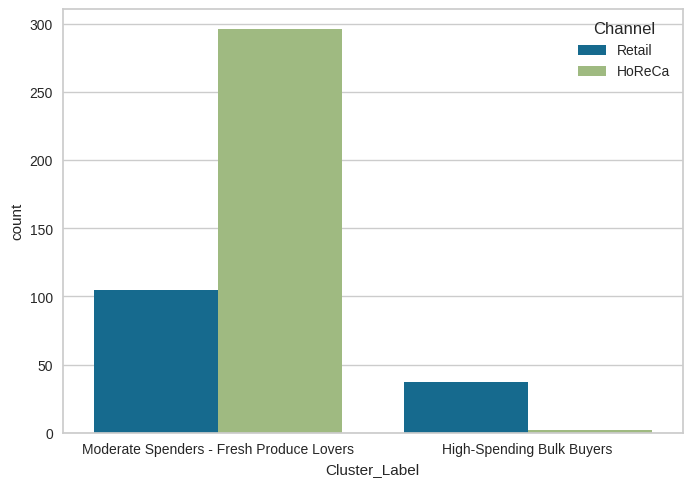

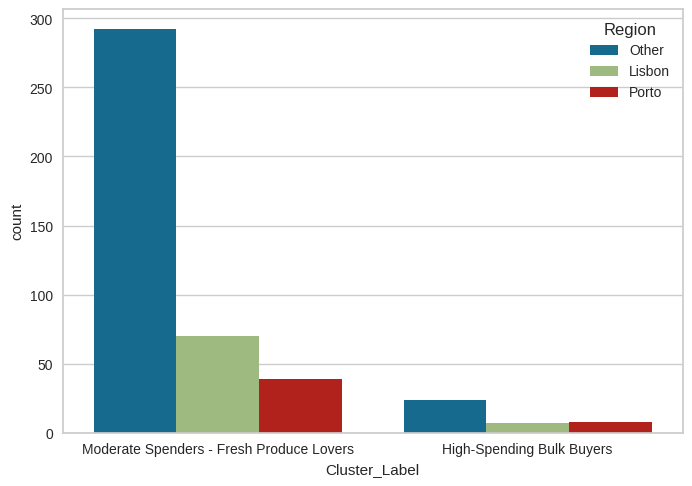

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot to show distribution of clusters across channels
sns.countplot(x='Cluster_Label', hue='Channel', data=data)
plt.show()

# Barplot to show distribution of clusters across regions
sns.countplot(x='Cluster_Label', hue='Region', data=data)
plt.show()


## 6. Future directions

- Targeted Marketing: Now that you know who the "Moderate Spenders - Fresh Produce Lovers" and "High-Spending Bulk Buyers" are, you can create targeted marketing campaigns for these groups.

- Product Recommendations: If you know one group prefers 'Fresh' produce, then new 'Fresh' products can be marketed specifically to this group.

**Advanced Analytics:**

- Churn Prediction: Use these clusters as features in a machine learning model to predict customer churn.

- Customer Lifetime Value Prediction: Similarly, these clusters can help in predicting the lifetime value of a customer, which can be crucial for business decisions.

- A/B Testing: You can perform A/B tests to try out different strategies on small subgroups within each cluster to find the most effective strategies before rolling them out on the entire cluster.


## 3.1. Kernel Principle Component Analysis

### Polynomial Function

In [ ]:
kpca = KernelPCA(n_components = 2, kernel='poly', degree = 2)
res_kpca_poly = kpca.fit_transform(transformed_data)

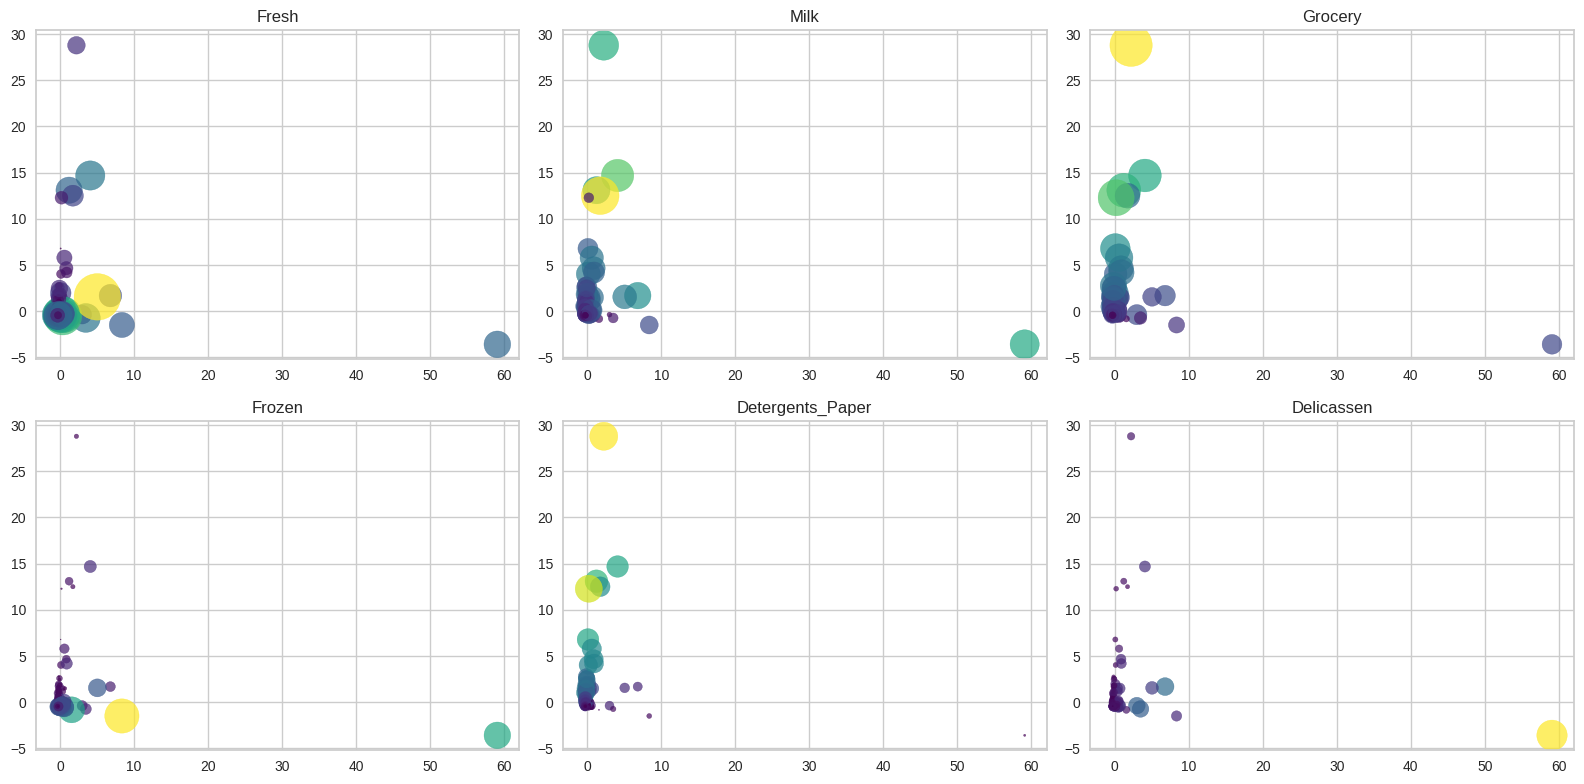

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16,8))

for feature, ax in zip(features, axes.ravel()):
  cols = 'viridis'
  sizes = data[feature].values / 100
  ax.scatter(res_kpca_poly[:, 0], res_kpca_poly[:, 1], s=sizes, alpha=0.7, c=data[feature], cmap=cols)
  ax.set_title(feature)

plt.tight_layout()


Radial Basis Function

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma = 0.05)
res_kpca_rbf = kpca.fit_transform(transformed_data)

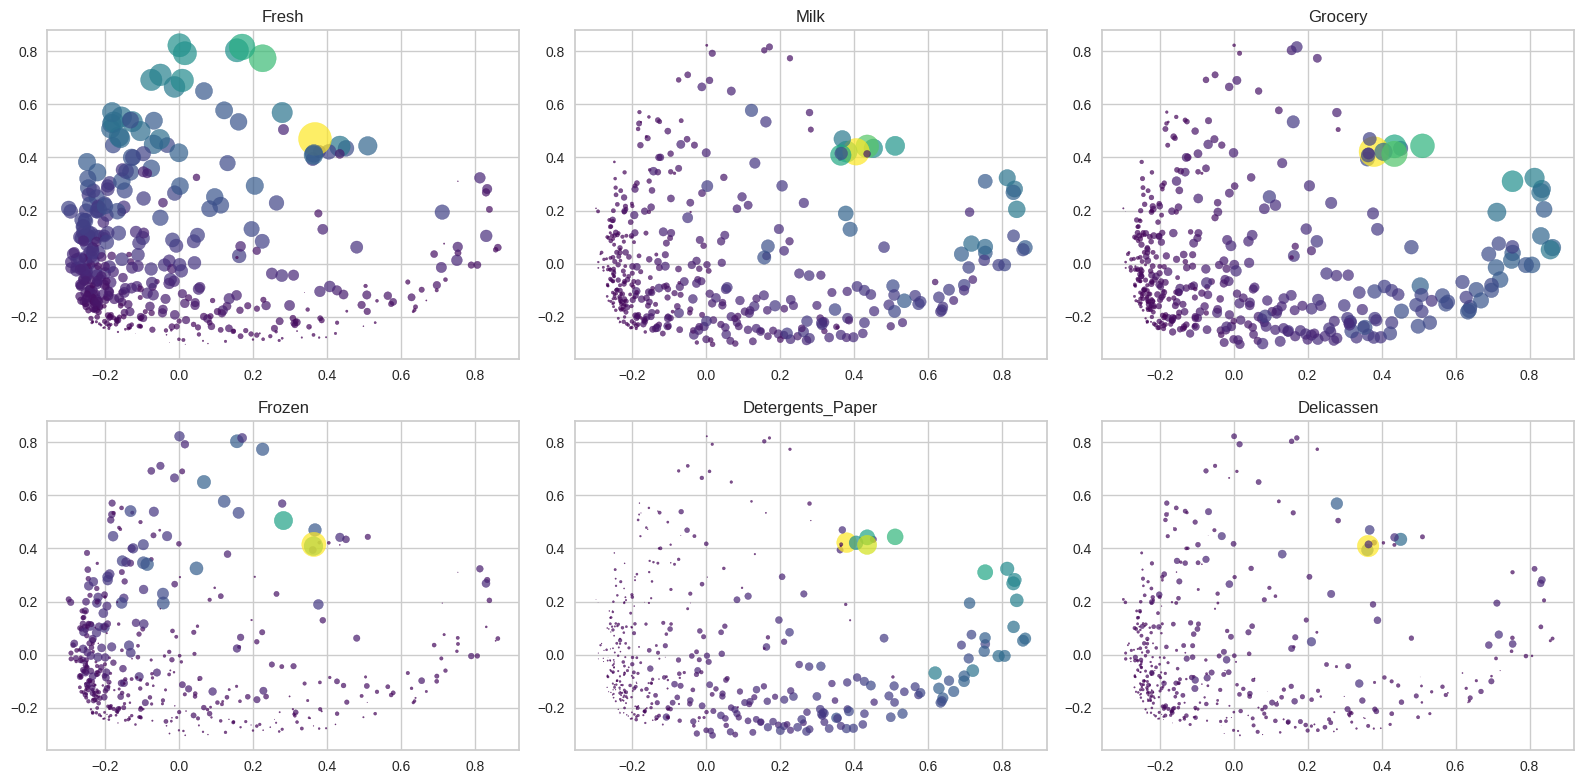

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16,8))

for feature, ax in zip(features, axes.ravel()):
  cols = 'viridis'
  sizes = data[feature].values/200
  ax.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1], s=sizes, alpha=0.7, c=data[feature], cmap=cols)
  ax.set_title(feature)

plt.tight_layout()


In [ ]:
data['x_kpca_poly'] = res_kpca_poly[:, 0]
data['y_kpca_poly'] = res_kpca_poly[:, 1]

data['x_kpca_rbf'] = res_kpca_rbf[:, 0]
data['y_kpca_rbf'] = res_kpca_rbf[:, 1]


## 4.2 Clustering


In [ ]:
clusterer = KMeans(n_clusters=3)

res_kpca = data[['x_kpca_rbf', 'y_kpca_rbf']].to_numpy()
clusters = clusterer.fit_predict(res_kpca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


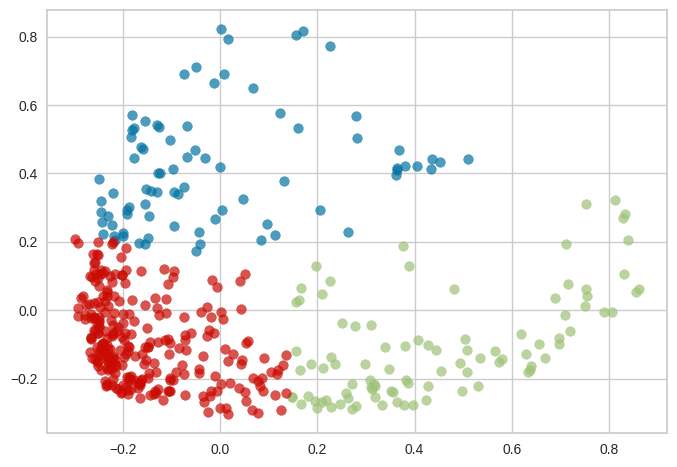

In [ ]:
for cluster in np.unique(clusters):
  cluster_data = res_kpca[clusters==cluster]
  plt.scatter(
      cluster_data[:,0],
      cluster_data[:, 1],
      alpha = 0.7
  )

In [ ]:
labels = clusterer.labels_


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Python/Wholesale customers data.csv")

data = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [ ]:
data['Labels'] = labels

# Calculate mean for each cluster
cluster_summary = data.groupby('Labels').mean()
print(cluster_summary)


               Fresh          Milk       Grocery       Frozen  \
Labels                                                          
0       30705.365854   7967.000000   9439.804878  7771.365854   
1        5268.521277  11720.031915  17815.723404  1606.095745   
2        8587.310606   3012.803030   3976.590909  2134.185606   

        Detergents_Paper   Delicassen  
Labels                                 
0            2719.024390  3072.390244  
1            8058.436170  1763.893617  
2            1088.651515   959.094697  


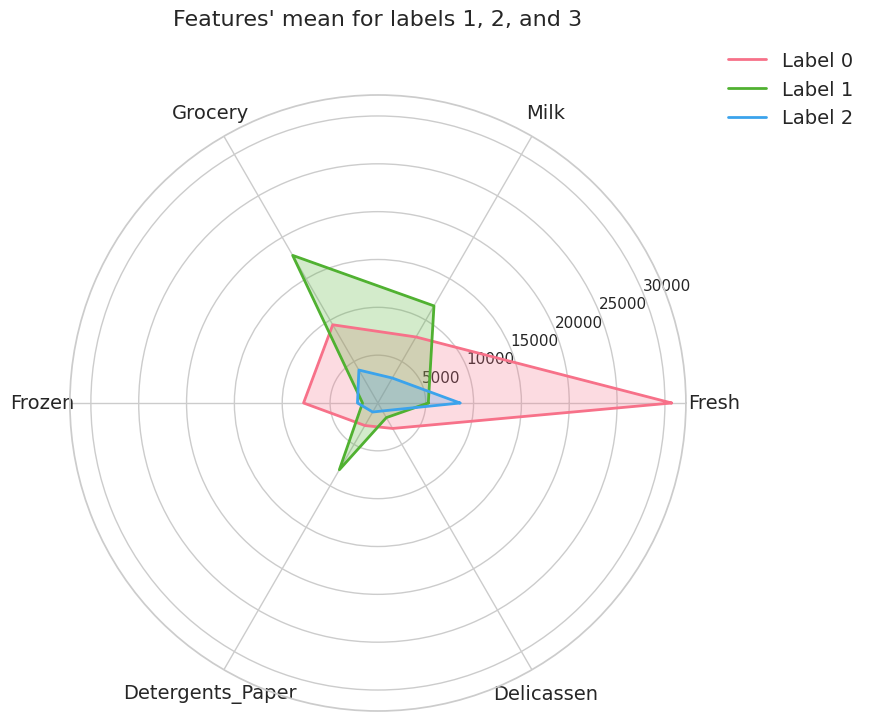

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Set the seaborn style for better visuals
sns.set_theme(style="whitegrid")

df = pd.DataFrame(data)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Number of variables we're plotting
num_vars = df.shape[1] - 1  # Minus 1 because 'Labels' is not a feature to plot

# Split the circle into even parts and save the angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Set the angles for the features
ax.set_xticks(angles)
ax.set_xticklabels(df.columns[:-1].tolist(), fontsize=14)

# Different colors for different labels
colors = sns.color_palette("husl", 3)

# Loop through each label to add it to the radar plot
for idx, label in enumerate([0, 1, 2]):  # Only looping through labels 1, 2, and 3
    # Filter data for the current label and compute the mean for each feature
    label_data = df[df['Labels'] == label]
    label_mean = label_data.mean(axis=0)[:-1]

    # Complete the circular plot
    label_mean_list = label_mean.tolist()
    label_mean_list.append(label_mean_list[0])

    # Add the initial angle to close the circle
    angles_with_closure = angles + [angles[0]]

    # Plot data
    ax.plot(angles_with_closure, label_mean_list, label=f"Label {label}", color=colors[idx], linewidth=2)
    ax.fill(angles_with_closure, label_mean_list, color=colors[idx], alpha=0.25)

# Add legend and title
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=14)
plt.title("Features' mean for labels 1, 2, and 3", fontsize=16, y=1.1)

plt.show()


# **Labelng Clusters**

**Cluster 0:**

Channel: Mainly channel type 1

Region: Appears across multiple regions (coded as 2.52)

Spending Categories: Moderate spending on 'Fresh', low on other categories

Suggested Label: "Moderate Fresh Shoppers"



**Cluster 1:**
Channel: Mostly channel type 1.86, likely more in type 2

Region: Appears across multiple regions (coded as 2.56)

Spending Categories: High spending on 'Milk', 'Grocery', and 'Detergents_Paper'

Suggested Label: "Bulk Buyers"



**Cluster 2:**
Channel: Mainly channel type 1

Region: Appears across multiple regions (coded as 2.56)

Spending Categories: Extremely high spending on 'Fresh', above-average 'Frozen' and 'Delicassen'

Suggested Label: "Fresh and Frozen Enthusiasts"
